In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [ ]:
# Convertendo os dados para um DataFrame
df = pd.concat([wine_quality.data.features, wine_quality.data.targets], axis=1)

In [ ]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

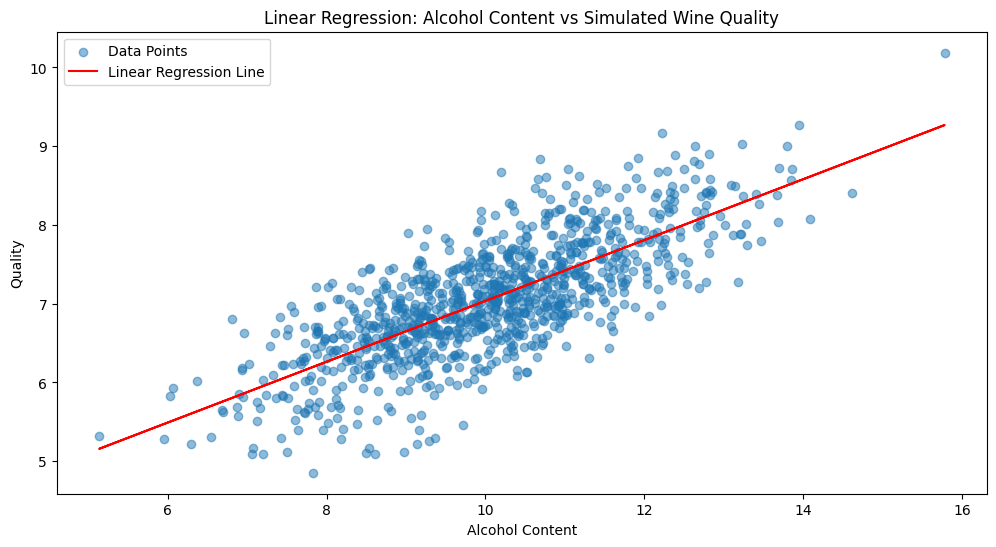

In [ ]:
# Simulando os dados localmente para demonstrar o gráfico de regressão linear
# Criando um dataset simulado com base em uma distribuição semelhante
np.random.seed(42)
n_samples = 1000
alcohol = np.random.normal(10, 1.5, n_samples)  # Simulando dados de teor alcoólico
quality = 3 + 0.4 * alcohol + np.random.normal(0, 0.5, n_samples)  # Qualidade com um pouco de ruído

# Ajustando a regressão linear usando o dataset simulado
X_simulated = alcohol.reshape(-1, 1)
y_simulated = quality
model_simulated = LinearRegression()
model_simulated.fit(X_simulated, y_simulated)
y_pred_simulated = model_simulated.predict(X_simulated)

# Plotando o gráfico de regressão linear com dados simulados
plt.figure(figsize=(12, 6))
plt.scatter(alcohol, quality, alpha=0.5, label='Data Points')
plt.plot(alcohol, y_pred_simulated, color='red', label='Linear Regression Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Linear Regression: Alcohol Content vs Simulated Wine Quality')
plt.legend()
plt.show()

In [ ]:
# 2. Preparação dos dados
X = df.drop('quality', axis=1).values  # Todas as colunas exceto 'quality' são características
y = df['quality'].values  # A coluna 'quality' é a variável alvo

In [ ]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

# Rede

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convertendo para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# 3. Construir a rede neural
class WineQualityNN(nn.Module):
    def __init__(self):
        super(WineQualityNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Instanciar o modelo
model = WineQualityNN()

In [ ]:
# Definir a função de perda e o otimizador
criterion = nn.MSELoss()  # Usando MSE porque estamos tratando a qualidade como uma variável contínua
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 4. Treinamento do modelo
num_epochs = 50
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 33.1677
Epoch [2/50], Loss: 32.4250
Epoch [3/50], Loss: 31.7007
Epoch [4/50], Loss: 30.9907
Epoch [5/50], Loss: 30.2900
Epoch [6/50], Loss: 29.5937
Epoch [7/50], Loss: 28.8958
Epoch [8/50], Loss: 28.1919
Epoch [9/50], Loss: 27.4777
Epoch [10/50], Loss: 26.7501
Epoch [11/50], Loss: 26.0076
Epoch [12/50], Loss: 25.2484
Epoch [13/50], Loss: 24.4710
Epoch [14/50], Loss: 23.6747
Epoch [15/50], Loss: 22.8590
Epoch [16/50], Loss: 22.0241
Epoch [17/50], Loss: 21.1705
Epoch [18/50], Loss: 20.2998
Epoch [19/50], Loss: 19.4140
Epoch [20/50], Loss: 18.5157
Epoch [21/50], Loss: 17.6075
Epoch [22/50], Loss: 16.6923
Epoch [23/50], Loss: 15.7734
Epoch [24/50], Loss: 14.8544
Epoch [25/50], Loss: 13.9392
Epoch [26/50], Loss: 13.0320
Epoch [27/50], Loss: 12.1373
Epoch [28/50], Loss: 11.2599
Epoch [29/50], Loss: 10.4045
Epoch [30/50], Loss: 9.5763
Epoch [31/50], Loss: 8.7802
Epoch [32/50], Loss: 8.0214
Epoch [33/50], Loss: 7.3049
Epoch [34/50], Loss: 6.6353
Epoch [35/50], Loss: 6.0171


In [ ]:
# 5. Avaliação do modelo
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse_loss = criterion(predictions, y_test_tensor)
    mae_loss = torch.mean(torch.abs(predictions - y_test_tensor))
    print(f'Mean Squared Error on Test Set: {mse_loss.item():.4f}')
    print(f'Mean Absolute Error on Test Set: {mae_loss.item():.4f}')

Mean Squared Error on Test Set: 3.5642
Mean Absolute Error on Test Set: 1.3204


Implementar técnica de data augmentation SMOTE
================================================

SMOTE é uma tecninca de data augmentation (criação de dados artificiais em cima de dados reais), que visa solucionar o problema de desbalanceamento de classes atravez de K-Neighbors e interpolação linear

> **K-Neighbors:** Neste contexto, a primeira etapa do SMOTE é selcionar um centroide dentro da quantidade de vizinhos estipuladas se baseando em um espaço delimitado dos dados.

EX: Para uma classe definida, é selecionado K-Neighbors, dentro deste limite de vizinhos, é selecionado um centroide onde será criado novas features entre ele e seus vizinhos por meio de interpolação linear.

> **Interpolação Linear:** Cria novos valores entre dois ponstos assumindo que entre eles existe um epaço linearmene continuo.
$$x_{novo}=x_a+λ(x_b-x_a)$$
- λ corresponde a localização deste novo ponto em relação aos dois pontos;
- λ = 0.5 o ponto fica exatamente no meio;
- λ = 0 fica mais proximo de $x_b$, e λ = 1 mais próximo de $x_a$

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Criar uma máscara para identificar as classes de interesse (qualidade acima de 7 e abaixo de 5)
mask = (y > 7) | (y < 5)

In [ ]:
# Aplicar SMOTE para as classes minoritárias (qualidade > 7 e < 5)
smote = SMOTE(k_neighbors=3)  # Ajustando n_neighbors para um valor menor
X_smote, y_smote = smote.fit_resample(X[mask], y[mask])

In [ ]:
# Combinar as amostras SMOTE com as instâncias que têm qualidade entre 5 e 7
mask_middle = (y >= 5) & (y <= 7)
X_final = np.vstack([X_smote, X[mask_middle]])
y_final = np.hstack([y_smote, y[mask_middle]])

In [ ]:
X_final

array([[ 7.4 ,  0.59,  0.08, ...,  3.38,  0.5 ,  9.  ],
       [ 5.7 ,  1.13,  0.09, ...,  3.5 ,  0.48,  9.8 ],
       [ 8.8 ,  0.61,  0.3 , ...,  3.26,  0.51,  9.3 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convertendo para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# 4. Treinamento do modelo
num_epochs = 50
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 3.7834
Epoch [2/50], Loss: 3.7507
Epoch [3/50], Loss: 3.7065
Epoch [4/50], Loss: 3.6509
Epoch [5/50], Loss: 3.5852
Epoch [6/50], Loss: 3.5115
Epoch [7/50], Loss: 3.4324
Epoch [8/50], Loss: 3.3504
Epoch [9/50], Loss: 3.2682
Epoch [10/50], Loss: 3.1881
Epoch [11/50], Loss: 3.1119
Epoch [12/50], Loss: 3.0412
Epoch [13/50], Loss: 2.9768
Epoch [14/50], Loss: 2.9193
Epoch [15/50], Loss: 2.8686
Epoch [16/50], Loss: 2.8243
Epoch [17/50], Loss: 2.7859
Epoch [18/50], Loss: 2.7526
Epoch [19/50], Loss: 2.7236
Epoch [20/50], Loss: 2.6979
Epoch [21/50], Loss: 2.6745
Epoch [22/50], Loss: 2.6527
Epoch [23/50], Loss: 2.6318
Epoch [24/50], Loss: 2.6111
Epoch [25/50], Loss: 2.5903
Epoch [26/50], Loss: 2.5692
Epoch [27/50], Loss: 2.5475
Epoch [28/50], Loss: 2.5252
Epoch [29/50], Loss: 2.5025
Epoch [30/50], Loss: 2.4793
Epoch [31/50], Loss: 2.4561
Epoch [32/50], Loss: 2.4329
Epoch [33/50], Loss: 2.4101
Epoch [34/50], Loss: 2.3878
Epoch [35/50], Loss: 2.3663
Epoch [36/50], Loss: 2.3457
E

In [ ]:
# 5. Avaliação do modelo
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse_loss = criterion(predictions, y_test_tensor)
    mae_loss = torch.mean(torch.abs(predictions - y_test_tensor))
    print(f'Mean Squared Error on Test Set: {mse_loss.item():.4f}')
    print(f'Mean Absolute Error on Test Set: {mae_loss.item():.4f}')

Mean Squared Error on Test Set: 2.2366
Mean Absolute Error on Test Set: 1.1270


## Problematicas do SMOTE

>Por levar em conta uma distribuição linear entre os pontos, valores com desvio padrão muito altos e que fogem de uma distribuição linear/normal, tendem a criar pontos fora da destribuição real, que não correspondem a dados reais do problema também chamados de **pontos irreais**.

EX: Classes com desvio padrão muito altos tendem a criar lacunas entre os pontos, ocasionando em dados que podem estar perto ou invadindo a fronteira de outras classes, criando amostras que não condizem com a realidade da classe.

Inserir Mix-Up
===============

>Assim como no SMOTE, O Mix-Up também é uma tecnica de data augmentation e regularização, que de forma semelhante ao SMOTE, cria novos pontos a partir de um espaço linear por meio de interpolação entre duas features e distribuição Beta. Seu príncipal objetivo é criar uma mistura que incentiva novos caminhos no gradiente, evitando overfitting e minimos locais irreais.

- **Interpolação Linear:** Diferente do SMOTE, onde sao feitas novas amostras a partir de classes, o Mix-Up faz a interpolação entre todos os dados do DataSet:
$$X_{mix}=\lambda X_a+(1-λ)X_b$$
$$$$
- Distribuição Beta: Mede a variabilidade de λ em relação aos valores de Beta(β) e aplpha($α$), onde α e β controlam o formato da distribuição:

  - **Se** α = β = 1 → distribuição **uniforme** (todos os λ igualmente prováveis).
  - **Se** α > 1, β > 1 → distribuição concentrada no **meio** (λ ≈ 0.5).
  - **Se** α < 1, β < 1 → distribuição concentrada nos **extremos** (próxima de 0 ou 1).
  - **Se** α = β → distribuição **simétrica** em torno de 0.5.


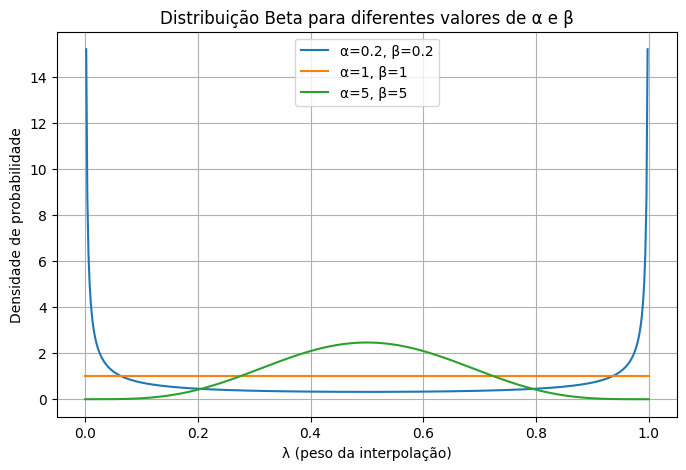

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Valores de alpha e beta para comparar
params = [(0.2, 0.2), (1, 1), (5, 5)]
x = np.linspace(0, 1, 500)

plt.figure(figsize=(8, 5))
for a, b in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f'α={a}, β={b}')

plt.title('Distribuição Beta para diferentes valores de α e β')
plt.xlabel('λ (peso da interpolação)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Função MixUp para gerar mais instâncias
def mixup(X, y, alpha=0.2, n_samples=2):
    X_mix = []
    y_mix = []

    for _ in range(n_samples):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        lam = np.random.beta(alpha, alpha)

        X_mixed = lam * X + (1 - lam) * X_shuffled
        y_mixed = lam * y + (1 - lam) * y_shuffled

        X_mix.append(X_mixed)
        y_mix.append(y_mixed)

    return np.vstack(X_mix), np.hstack(y_mix)

In [ ]:
# Aplicar MixUp dentro de cada grupo de qualidade
X_mix = []
y_mix = []

for quality in np.unique(y_final):
    X_group = X_final[y_final == quality]
    y_group = y_final[y_final == quality]

    X_mixed, y_mixed = mixup(X_group, y_group)

    X_mix.append(X_mixed)
    y_mix.append(y_mixed)

# Combinar as amostras mixadas de volta em um único conjunto de dados
X_combined = np.vstack(X_mix)
y_combined = np.hstack(y_mix)

In [ ]:
X_combined

array([[1.15999898e+01, 5.80001440e-01, 6.59998310e-01, ...,
        3.25000087e+00, 5.69999885e-01, 9.00000461e+00],
       [1.03999920e+01, 6.10001059e-01, 4.89998949e-01, ...,
        3.16000104e+00, 6.29999676e-01, 8.40000696e+00],
       [7.40000044e+00, 1.18499825e+00, 6.74059100e-07, ...,
        3.62999883e+00, 5.39999772e-01, 1.07000008e+01],
       ...,
       [8.58873705e+00, 2.65898629e-01, 4.51314239e-01, ...,
        3.23882218e+00, 4.53655347e-01, 1.10372821e+01],
       [7.91868842e+00, 3.09683859e-01, 3.86737641e-01, ...,
        3.28642935e+00, 4.94173199e-01, 1.14573336e+01],
       [7.50539144e+00, 2.44483210e-01, 3.79416352e-01, ...,
        3.28219055e+00, 4.72518300e-01, 1.23718646e+01]])

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertendo para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# 4. Treinamento do modelo
num_epochs = 50
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 1.9539
Epoch [2/50], Loss: 1.9432
Epoch [3/50], Loss: 1.9326
Epoch [4/50], Loss: 1.9220
Epoch [5/50], Loss: 1.9115
Epoch [6/50], Loss: 1.9011
Epoch [7/50], Loss: 1.8909
Epoch [8/50], Loss: 1.8808
Epoch [9/50], Loss: 1.8710
Epoch [10/50], Loss: 1.8613
Epoch [11/50], Loss: 1.8519
Epoch [12/50], Loss: 1.8427
Epoch [13/50], Loss: 1.8337
Epoch [14/50], Loss: 1.8249
Epoch [15/50], Loss: 1.8163
Epoch [16/50], Loss: 1.8078
Epoch [17/50], Loss: 1.7994
Epoch [18/50], Loss: 1.7911
Epoch [19/50], Loss: 1.7829
Epoch [20/50], Loss: 1.7749
Epoch [21/50], Loss: 1.7668
Epoch [22/50], Loss: 1.7589
Epoch [23/50], Loss: 1.7511
Epoch [24/50], Loss: 1.7433
Epoch [25/50], Loss: 1.7356
Epoch [26/50], Loss: 1.7280
Epoch [27/50], Loss: 1.7205
Epoch [28/50], Loss: 1.7130
Epoch [29/50], Loss: 1.7057
Epoch [30/50], Loss: 1.6984
Epoch [31/50], Loss: 1.6912
Epoch [32/50], Loss: 1.6841
Epoch [33/50], Loss: 1.6771
Epoch [34/50], Loss: 1.6702
Epoch [35/50], Loss: 1.6633
Epoch [36/50], Loss: 1.6565
E

In [ ]:
# 5. Avaliação do modelo
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse_loss = criterion(predictions, y_test_tensor)
    mae_loss = torch.mean(torch.abs(predictions - y_test_tensor))
    print(f'Mean Squared Error on Test Set: {mse_loss.item():.4f}')
    print(f'Mean Absolute Error on Test Set: {mae_loss.item():.4f}')

Mean Squared Error on Test Set: 1.4755
Mean Absolute Error on Test Set: 0.9388


## Problematicas Mix-Up

Como o príncipio do Mix-Up mistura todos dados do DataFrame, alguns requisitos devem ser atendidos antes de aplicar esta tecnica:

- Classes ligeiramente balanceadas: Caso exista o desbalanceamento de classes, a interpolação entre todas as classes pode acabar por consumir as classem minoritárias, as tornando invisiveis aos olhos da rede.
- Dependencia linear: Quando duas features tem dependencia linear, o mix-up acaba por cirar dados mistos que não seguem a regra de linearidade, criando valores não aplicaveis e irreais


Inserir ruído gaussiano
=======================

In [ ]:
# Aplicar ruído gaussiano segmentado pela classe quality
def add_gaussian_noise(X, mean=0, stddev=0.1):
    noise = np.random.normal(mean, stddev, X.shape)
    return X + noise

In [ ]:
X_noisy = []
y_noisy = []

for quality in np.unique(y_combined):
    X_group = X_combined[y_combined == quality]
    y_group = y_combined[y_combined == quality]

    X_group_noisy = add_gaussian_noise(X_group)

    X_noisy.append(X_group_noisy)
    y_noisy.append(y_group)

# Combinar as amostras com ruído de volta em um único conjunto de dados
X_final_noisy = np.vstack([X_combined] + X_noisy)
y_final_noisy = np.hstack([y_combined] + y_noisy)

In [ ]:
X_final_noisy

array([[10.3606451 ,  0.4495194 ,  0.47895105, ...,  3.15383408,
         0.53884877,  9.35214647],
       [ 9.69683263,  0.56804031,  0.47274674, ...,  3.13703189,
         0.59668866,  9.06057724],
       [ 7.38473261,  0.86763757,  0.1406929 , ...,  3.43100533,
         0.51296999, 10.7904761 ],
       ...,
       [ 8.10427668,  0.14396187,  0.59156379, ...,  3.16690746,
         0.33553317, 11.72847718],
       [ 6.58089145,  0.25502186,  0.27525059, ...,  3.45401118,
         0.51736464, 12.48341482],
       [ 6.88709876,  0.41315748,  0.41099086, ...,  3.31969781,
         0.43249432, 12.84239108]])

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_final_noisy, y_final_noisy, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertendo para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# 4. Treinamento do modelo
num_epochs = 50
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 2.9309
Epoch [2/50], Loss: 2.9132
Epoch [3/50], Loss: 2.8846
Epoch [4/50], Loss: 2.8472
Epoch [5/50], Loss: 2.8033
Epoch [6/50], Loss: 2.7546
Epoch [7/50], Loss: 2.7027
Epoch [8/50], Loss: 2.6490
Epoch [9/50], Loss: 2.5944
Epoch [10/50], Loss: 2.5399
Epoch [11/50], Loss: 2.4861
Epoch [12/50], Loss: 2.4335
Epoch [13/50], Loss: 2.3823
Epoch [14/50], Loss: 2.3330
Epoch [15/50], Loss: 2.2856
Epoch [16/50], Loss: 2.2402
Epoch [17/50], Loss: 2.1971
Epoch [18/50], Loss: 2.1561
Epoch [19/50], Loss: 2.1174
Epoch [20/50], Loss: 2.0811
Epoch [21/50], Loss: 2.0473
Epoch [22/50], Loss: 2.0159
Epoch [23/50], Loss: 1.9868
Epoch [24/50], Loss: 1.9600
Epoch [25/50], Loss: 1.9352
Epoch [26/50], Loss: 1.9123
Epoch [27/50], Loss: 1.8910
Epoch [28/50], Loss: 1.8712
Epoch [29/50], Loss: 1.8528
Epoch [30/50], Loss: 1.8355
Epoch [31/50], Loss: 1.8193
Epoch [32/50], Loss: 1.8040
Epoch [33/50], Loss: 1.7895
Epoch [34/50], Loss: 1.7758
Epoch [35/50], Loss: 1.7628
Epoch [36/50], Loss: 1.7504
E

In [ ]:
# 5. Avaliação do modelo
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse_loss = criterion(predictions, y_test_tensor)
    mae_loss = torch.mean(torch.abs(predictions - y_test_tensor))
    print(f'Mean Squared Error on Test Set: {mse_loss.item():.4f}')
    print(f'Mean Absolute Error on Test Set: {mae_loss.item():.4f}')

Mean Squared Error on Test Set: 1.5883
Mean Absolute Error on Test Set: 0.9762
